![image.png](https://i.imgur.com/a3uAqnb.png)

# Logistic Regression for Titanic Survival Prediction - Homework Assignment

In this homework, you will implement a **Logistic Regression classifier** to predict passenger survival on the Titanic. This project will help you understand the fundamentals of classification using logistic regression.

## 📌 Project Overview
- **Task**: Predict passenger survival on the Titanic
- **Algorithm**: Logistic Regression for binary classification
- **Dataset**: Titanic passenger dataset (provided)
- **Goal**: Build an accurate classification model using scikit-learn

## 📚 Learning Objectives
By completing this assignment, you will:
- Understand logistic regression for binary classification problems
- Learn data preprocessing and feature engineering techniques
- Practice exploratory data analysis (EDA)
- Implement feature selection and model evaluation
- Learn about classification metrics and model performance
- Identify the most important features for survival prediction

## 1️⃣ Initial Setup and Library Installation

**Task**: Set up the environment and install necessary libraries.

In [ ]:
from IPython.display import clear_output

## 2️⃣ Library Installation (if needed)

**Task**: Install required libraries for the project.

In [31]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

clear_output()

## 3️⃣ Import Libraries and Configuration

**Task**: Import all necessary libraries and set up configuration parameters.

**Requirements**:
- Import data processing libraries (pandas, numpy)
- Import visualization libraries (matplotlib, seaborn)
- Import scikit-learn modules for preprocessing and modeling
- Set random seeds for reproducibility
- Configure display options for better data visualization

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Configure matplotlib
plt.style.use('default')
sns.set_palette("husl")

## 4️⃣ Data Loading and Initial Exploration

**Task**: Load the Titanic dataset and perform initial exploration.

**Requirements**:
- Download and load the dataset
- Display basic information about the data
- Check data types and structure
- Identify the target variable and features

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset") # Titanic-Dataset.csv

print("Path to dataset files:", path)

Path to dataset files: /home/ali/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [34]:
# Load the Titanic dataset
titanic_data = pd.read_csv(f"{path}/Titanic-Dataset.csv")

# Display basic information about the dataset
print("Dataset shape:", titanic_data.shape)
print("\nDataset info:")
print(titanic_data.info())
print("\nFirst 5 rows:")
print(titanic_data.head())

Dataset shape: (891, 12)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4   

## 5️⃣ Exploratory Data Analysis (EDA)

**Task**: Perform comprehensive exploratory data analysis to understand the data.

**Requirements**:
- Examine data structure and missing values
- Analyze the distribution of the target variable
- Explore relationships between features and survival
- Create visualizations to understand data patterns

In [35]:
# Display first few rows of the dataset
print("First 10 rows of the dataset:")
print(titanic_data.head(10))

# Get basic information about the dataset (shape, data types)
print(f"\nDataset shape: {titanic_data.shape}")
print(f"Number of features: {titanic_data.shape[1]}")
print(f"Number of samples: {titanic_data.shape[0]}")

print("\nData types:")
print(titanic_data.dtypes)

# Check for missing values
print("\nMissing values:")
missing_values = titanic_data.isnull().sum()
print(missing_values[missing_values > 0])

# Display statistical summary of numerical features
print("\nStatistical summary of numerical features:")
print(titanic_data.describe())

First 10 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCar

Survival distribution:
Did not survive (0): 549 (61.6%)
Survived (1): 342 (38.4%)


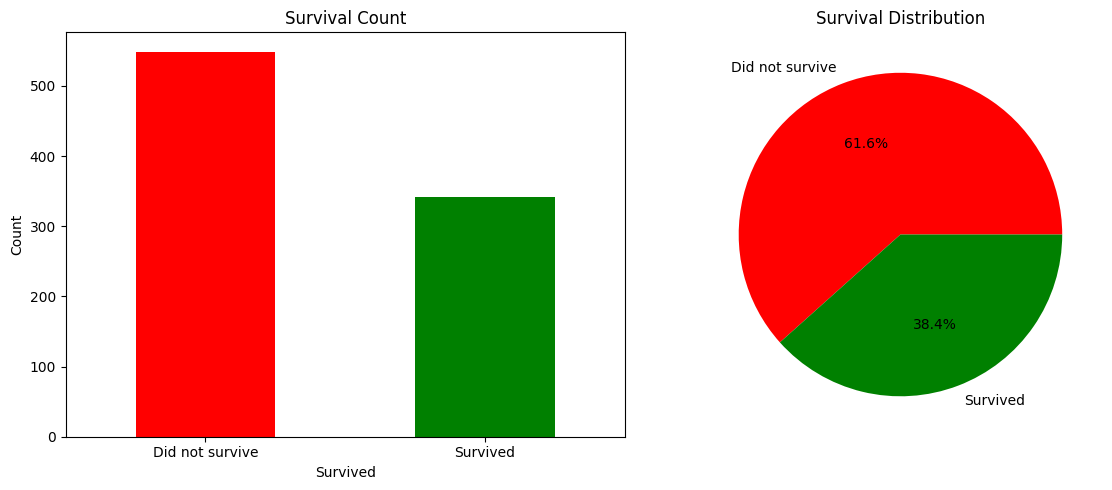

In [36]:
# Analyze the target variable distribution (Survived)
print("Survival distribution:")
survival_counts = titanic_data['Survived'].value_counts()
survival_percentages = titanic_data['Survived'].value_counts(normalize=True) * 100
print(f"Did not survive (0): {survival_counts[0]} ({survival_percentages[0]:.1f}%)")
print(f"Survived (1): {survival_counts[1]} ({survival_percentages[1]:.1f}%)")

# Create visualizations for survival distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
titanic_data['Survived'].value_counts().plot(kind='bar', ax=axes[0], color=['red', 'green'])
axes[0].set_title('Survival Count')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Did not survive', 'Survived'], rotation=0)

# Pie chart
axes[1].pie(survival_counts.values, labels=['Did not survive', 'Survived'], 
           autopct='%1.1f%%', colors=['red', 'green'])
axes[1].set_title('Survival Distribution')

plt.tight_layout()
plt.show()


Survival rates by Sex:
            mean  count
Sex                    
female  0.742038    314
male    0.188908    577

Survival rates by Pclass:
            mean  count
Pclass                 
1       0.629630    216
2       0.472826    184
3       0.242363    491

Survival rates by Embarked:
              mean  count
Embarked                 
C         0.553571    168
Q         0.389610     77
S         0.336957    644

Survival rates by Age Group:
AgeGroup
Child          0.503597
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


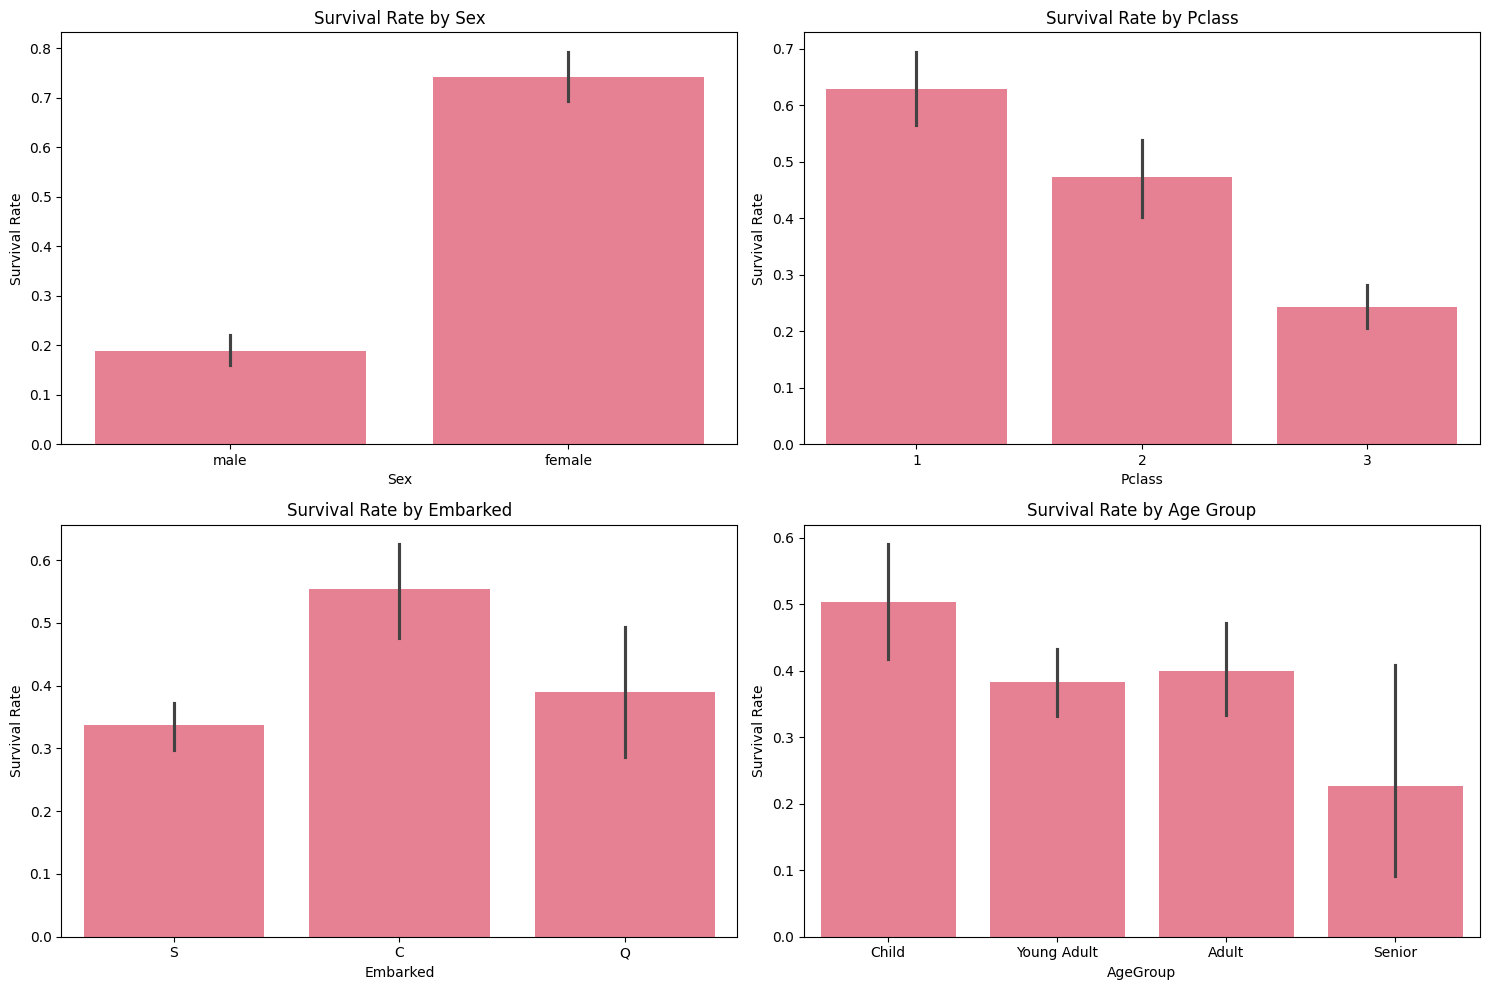

In [37]:
# Explore survival rates by different categorical features (Sex, Pclass, Embarked)
categorical_features = ['Sex', 'Pclass', 'Embarked']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Calculate survival rates
    survival_rate = titanic_data.groupby(feature)['Survived'].agg(['mean', 'count'])
    print(f"\nSurvival rates by {feature}:")
    print(survival_rate)
    
    # Create visualization
    sns.barplot(data=titanic_data, x=feature, y='Survived', ax=axes[i])
    axes[i].set_title(f'Survival Rate by {feature}')
    axes[i].set_ylabel('Survival Rate')

# Age group analysis
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 60, 100], 
                                  labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_survival = titanic_data.groupby('AgeGroup')['Survived'].mean()
print(f"\nSurvival rates by Age Group:")
print(age_survival)

sns.barplot(data=titanic_data, x='AgeGroup', y='Survived', ax=axes[3])
axes[3].set_title('Survival Rate by Age Group')
axes[3].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

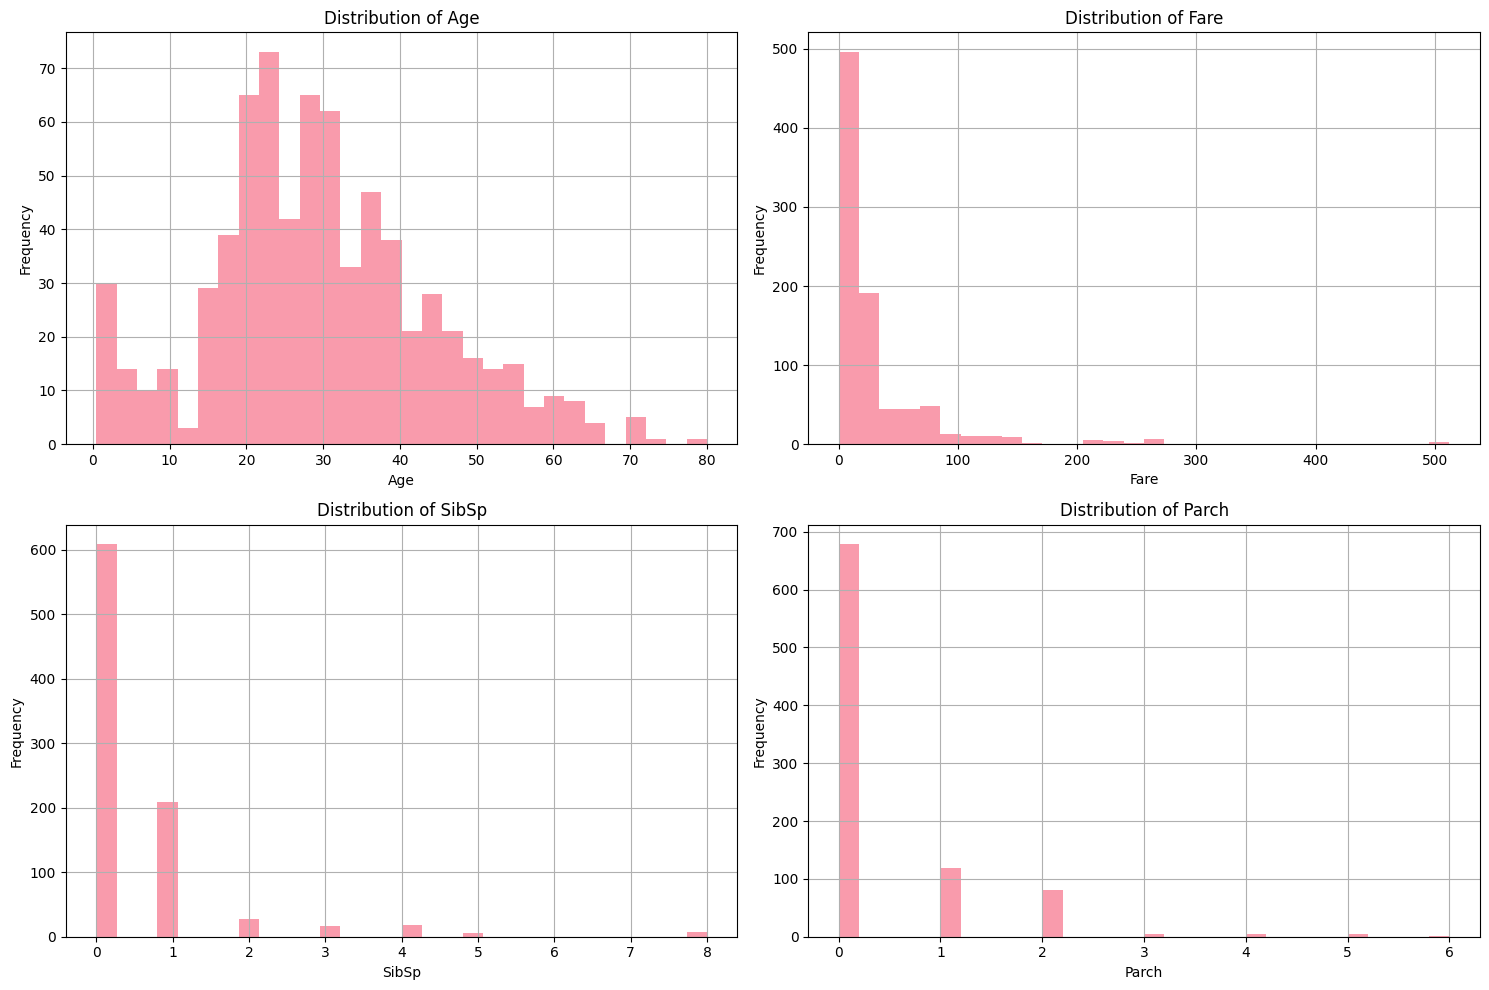

Survival analysis by numerical features:

Survival rate by Age bins:
AgeBin
(0, 12]      0.579710
(12, 18]     0.428571
(18, 35]     0.382682
(35, 60]     0.400000
(60, 100]    0.227273
Name: Survived, dtype: float64

Survival rate by Fare bins:
FareBin
(0, 10]       0.205607
(10, 30]      0.433022
(30, 100]     0.535912
(100, 600]    0.735849
Name: Survived, dtype: float64

Survival rate by family composition (SibSp, Parch):
SibSp  Parch
0      0        0.303538
       1        0.657895
       2        0.724138
       3        1.000000
       4        0.000000
       5        0.000000
1      0        0.520325
       1        0.596491
       2        0.631579
       3        0.333333
       4        0.000000
       5        0.333333
       6        0.000000
2      0        0.250000
       1        0.857143
       2        0.500000
       3        1.000000
3      0        1.000000
       1        0.000000
       2        0.285714
4      1        0.000000
       2        0.333333
5      

In [38]:
# Analyze numerical features (Age, Fare, SibSp, Parch)
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Create histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    titanic_data[feature].hist(bins=30, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Examine survival rates across different age groups and fare ranges
print("Survival analysis by numerical features:")

# Age analysis
age_bins = [0, 12, 18, 35, 60, 100]
titanic_data['AgeBin'] = pd.cut(titanic_data['Age'], bins=age_bins)
age_survival = titanic_data.groupby('AgeBin')['Survived'].mean()
print("\nSurvival rate by Age bins:")
print(age_survival)

# Fare analysis
fare_bins = [0, 10, 30, 100, 600]
titanic_data['FareBin'] = pd.cut(titanic_data['Fare'], bins=fare_bins)
fare_survival = titanic_data.groupby('FareBin')['Survived'].mean()
print("\nSurvival rate by Fare bins:")
print(fare_survival)

# Family size analysis
family_survival = titanic_data.groupby(['SibSp', 'Parch'])['Survived'].mean()
print("\nSurvival rate by family composition (SibSp, Parch):")
print(family_survival)

## 6️⃣ Data Preprocessing and Feature Engineering

**Task**: Clean and prepare the data for logistic regression modeling.

**Requirements**:
- Handle missing values appropriately
- Encode categorical variables
- Create new features if beneficial
- Scale numerical features if necessary
- Select relevant features for modeling

In [47]:
# Create a copy of the dataset for preprocessing
titanic_processed = titanic_data.copy()

# Handle missing values
print("Missing values before preprocessing:")
print(titanic_processed.isnull().sum())

# Fill missing Age values with median
age_median = titanic_processed['Age'].median()
titanic_processed['Age'].fillna(age_median, inplace=True)

# Fill missing Embarked values with mode
embarked_mode = titanic_processed['Embarked'].mode()[0]
titanic_processed['Embarked'].fillna(embarked_mode, inplace=True)

# Handle missing Cabin values - create binary feature
titanic_processed['HasCabin'] = titanic_processed['Cabin'].notna().astype(int)

# Feature engineering
# Create FamilySize feature from SibSp and Parch
titanic_processed['FamilySize'] = titanic_processed['SibSp'] + titanic_processed['Parch'] + 1

# Create IsAlone feature
titanic_processed['IsAlone'] = (titanic_processed['FamilySize'] == 1).astype(int)

# Create Age groups
titanic_processed['AgeGroup'] = pd.cut(titanic_processed['Age'], 
                                       bins=[0, 12, 18, 35, 60, 100], 
                                       labels=[0, 1, 2, 3, 4])

# Create Fare groups
titanic_processed['FareGroup'] = pd.cut(titanic_processed['Fare'], 
                                        bins=[0, 10, 30, 100, 600], 
                                        labels=[0, 1, 2, 3])

# Handle missing values in FareGroup
faregroup_mode = titanic_processed['FareGroup'].mode()[0]
titanic_processed['FareGroup'].fillna(faregroup_mode, inplace=True)

print("\nMissing values after preprocessing:")
print(titanic_processed.isnull().sum())
print(f"\nNew features created: FamilySize, IsAlone, HasCabin, AgeGroup, FareGroup")

Missing values before preprocessing:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
AgeBin         177
FareBin         15
dtype: int64

Missing values after preprocessing:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
AgeBin         177
FareBin         15
HasCabin         0
FamilySize       0
IsAlone          0
FareGroup        0
dtype: int64

New features created: FamilySize, IsAlone, HasCabin, AgeGroup, FareGroup


In [48]:
# Encode categorical variables
# Convert Sex to numerical values
titanic_processed['Sex'] = titanic_processed['Sex'].map({'male': 0, 'female': 1})

# Encode Embarked using label encoding
embarked_encoder = LabelEncoder()
titanic_processed['Embarked'] = embarked_encoder.fit_transform(titanic_processed['Embarked'])

# Remove extra columns created during EDA
columns_to_drop_extra = ['AgeBin', 'FareBin']
for col in columns_to_drop_extra:
    if col in titanic_processed.columns:
        titanic_processed = titanic_processed.drop(columns=[col])

# Convert categorical features to numeric
titanic_processed['AgeGroup'] = titanic_processed['AgeGroup'].astype(int)
titanic_processed['FareGroup'] = titanic_processed['FareGroup'].astype(int)

# Drop irrelevant columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_processed = titanic_processed.drop(columns=columns_to_drop)

# Final cleanup of any remaining missing values
numerical_cols = titanic_processed.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if titanic_processed[col].isnull().any():
        titanic_processed[col].fillna(titanic_processed[col].median(), inplace=True)

print("Processed dataset info:")
print(titanic_processed.info())
print(f"\nDataset shape after preprocessing: {titanic_processed.shape}")
print(f"\nRemaining columns: {list(titanic_processed.columns)}")
print(f"\nFinal missing values check:")
print(titanic_processed.isnull().sum())
print(f"\nFirst 5 rows of processed data:")
print(titanic_processed.head())

Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   AgeGroup    891 non-null    int64  
 9   HasCabin    891 non-null    int64  
 10  FamilySize  891 non-null    int64  
 11  IsAlone     891 non-null    int64  
 12  FareGroup   891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB
None

Dataset shape after preprocessing: (891, 13)

Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'HasCabin', 'FamilySize', 'IsAlone', 'FareGrou

## 7️⃣ Feature Selection and Data Splitting

**Task**: Select the most relevant features and split the data for training and testing.

**Requirements**:
- Separate features (X) from target variable (y)
- Split data into training and testing sets (80:20 ratio)
- Apply feature scaling if necessary
- Ensure no data leakage

In [49]:
# Separate features from target variable
X = titanic_processed.drop('Survived', axis=1)
y = titanic_processed['Survived']

print("Features (X):")
print(X.columns.tolist())
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Verify no missing values remain
print(f"\nData quality check:")
print(f"Missing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

# Split the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the shapes of training and testing sets
print(f"\nTraining set shapes:")
print(f"X_train: {X_train_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"\nTesting set shapes:")
print(f"X_test: {X_test_scaled.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Features (X):
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'HasCabin', 'FamilySize', 'IsAlone', 'FareGroup']
Feature matrix shape: (891, 12)
Target vector shape: (891,)

Data quality check:
Missing values in features: 0
Missing values in target: 0

Training set shapes:
X_train: (712, 12)
y_train: (712,)

Testing set shapes:
X_test: (179, 12)
y_test: (179,)

Class distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Class distribution in testing set:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


## 8️⃣ Logistic Regression Model Training

**Task**: Train a logistic regression model on the training data.

**Requirements**:
- Initialize LogisticRegression with appropriate parameters
- Fit the model on training data
- Use cross-validation if needed

In [50]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')

# Train the model on training data
logistic_model.fit(X_train_scaled, y_train)

# Display model parameters and coefficients
print("Model training completed!")
print(f"Model parameters: {logistic_model.get_params()}")
print(f"\nModel intercept: {logistic_model.intercept_[0]:.4f}")
print(f"\nModel coefficients:")

# Create coefficient DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

print(f"\nModel score on training data: {logistic_model.score(X_train_scaled, y_train):.4f}")

Model training completed!
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Model intercept: -0.6453

Model coefficients:
       Feature  Coefficient
1          Sex     1.253965
0       Pclass    -0.583499
7     AgeGroup    -0.392281
8     HasCabin     0.374112
3        SibSp    -0.306347
10     IsAlone    -0.271470
9   FamilySize    -0.248245
6     Embarked    -0.138682
2          Age    -0.132685
4        Parch    -0.082951
11   FareGroup     0.052795
5         Fare     0.031702

Model score on training data: 0.8104


## 9️⃣ Model Evaluation and Performance Analysis

**Task**: Evaluate the trained model on both training and testing data.

**Requirements**:
- Make predictions on both training and testing sets
- Calculate various classification metrics
- Create confusion matrix
- Analyze model performance and potential overfitting

In [51]:
# Make predictions on training and testing sets
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Get prediction probabilities
y_train_prob = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Model Performance Summary:")
print("="*50)
print(f"Training Set Performance:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1-Score:  {train_f1:.4f}")

print(f"\nTesting Set Performance:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

# Display classification report
print(f"\nDetailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Model Performance Summary:
Training Set Performance:
  Accuracy:  0.8104
  Precision: 0.7614
  Recall:    0.7363
  F1-Score:  0.7486

Testing Set Performance:
  Accuracy:  0.8156
  Precision: 0.7727
  Recall:    0.7391
  F1-Score:  0.7556

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



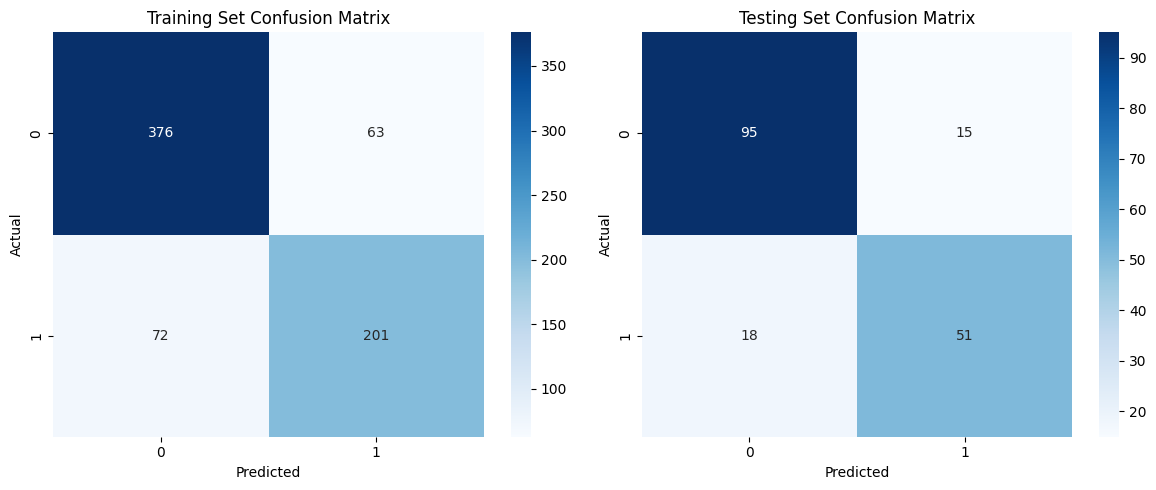


Performance Comparison:
      Metric  Training   Testing
0   Accuracy  0.810393  0.815642
1  Precision  0.761364  0.772727
2     Recall  0.736264  0.739130
3   F1-Score  0.748603  0.755556

Model Generalization Analysis:
Training vs Testing Accuracy difference: -0.0052
✓ Model shows good generalization


In [52]:
# Create and visualize confusion matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training confusion matrix
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Testing confusion matrix
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Testing Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Create a comprehensive performance comparison
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Training': [train_accuracy, train_precision, train_recall, train_f1],
    'Testing': [test_accuracy, test_precision, test_recall, test_f1]
})

print("\nPerformance Comparison:")
print(performance_df)

# Analyze model generalization
print(f"\nModel Generalization Analysis:")
print(f"Training vs Testing Accuracy difference: {train_accuracy - test_accuracy:.4f}")
if abs(train_accuracy - test_accuracy) < 0.05:
    print("✓ Model shows good generalization")
else:
    print("⚠ Model may be overfitting")

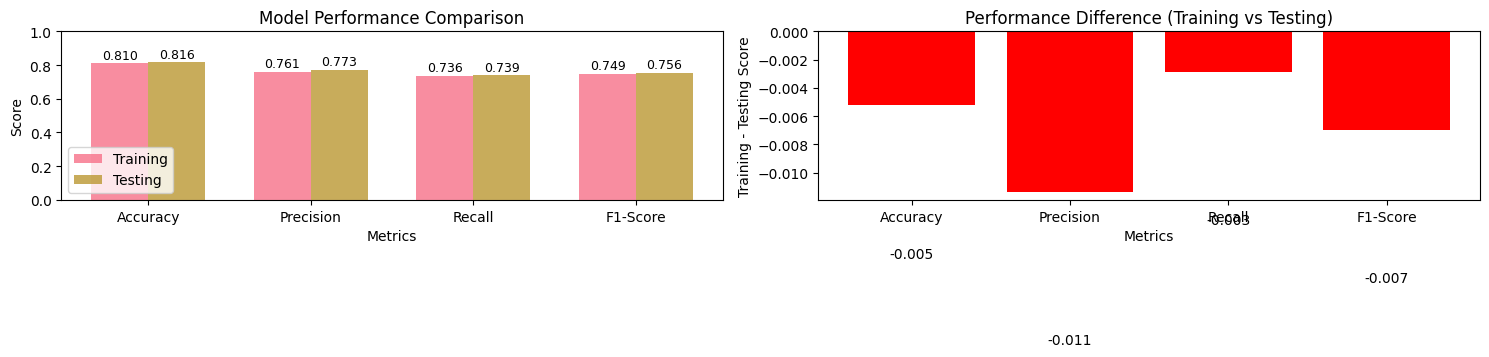

In [53]:
# Visualize model performance metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, train_scores, width, label='Training', alpha=0.8)
axes[0].bar(x + width/2, test_scores, width, label='Testing', alpha=0.8)
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim(0, 1)

# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(train_scores, test_scores)):
    axes[0].text(i - width/2, train_val + 0.01, f'{train_val:.3f}', 
                ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, test_val + 0.01, f'{test_val:.3f}', 
                ha='center', va='bottom', fontsize=9)

# Performance difference plot
differences = [train_scores[i] - test_scores[i] for i in range(len(metrics))]
bars = axes[1].bar(metrics, differences, color=['green' if d >= 0 else 'red' for d in differences])
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Training - Testing Score')
axes[1].set_title('Performance Difference (Training vs Testing)')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add value labels
for bar, diff in zip(bars, differences):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + (0.005 if height >= 0 else -0.01),
                f'{diff:.3f}', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

## 🔟 Feature Importance Analysis

**Task**: Analyze which features most strongly influence passenger survival.

**Requirements**:
- Extract and interpret model coefficients
- Rank features by importance
- Create visualizations for feature importance
- Provide insights about survival factors

Feature Importance Ranking:
 1. Sex          | Coef:  1.2540 | ↑ Increases survival probability
 2. Pclass       | Coef: -0.5835 | ↓ Decreases survival probability
 3. AgeGroup     | Coef: -0.3923 | ↓ Decreases survival probability
 4. HasCabin     | Coef:  0.3741 | ↑ Increases survival probability
 5. SibSp        | Coef: -0.3063 | ↓ Decreases survival probability
 6. IsAlone      | Coef: -0.2715 | ↓ Decreases survival probability
 7. FamilySize   | Coef: -0.2482 | ↓ Decreases survival probability
 8. Embarked     | Coef: -0.1387 | ↓ Decreases survival probability
 9. Age          | Coef: -0.1327 | ↓ Decreases survival probability
10. Parch        | Coef: -0.0830 | ↓ Decreases survival probability
11. FareGroup    | Coef:  0.0528 | ↑ Increases survival probability
12. Fare         | Coef:  0.0317 | ↑ Increases survival probability


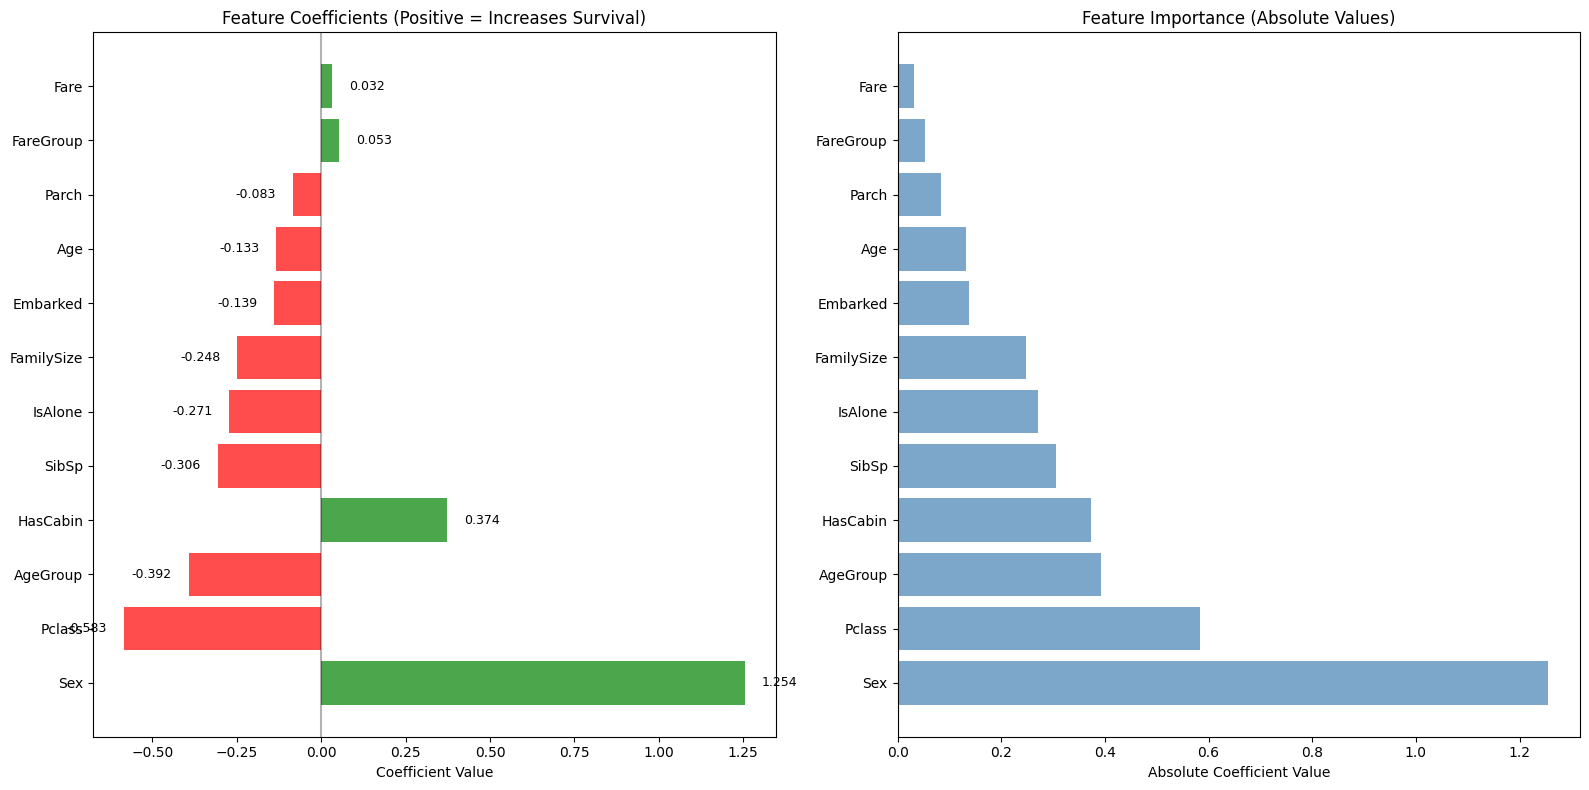


KEY INSIGHTS FROM FEATURE IMPORTANCE ANALYSIS:

TOP 3 MOST IMPORTANT FEATURES:
1. Sex (coefficient: 1.2540) - strongly associated with survival
2. Pclass (coefficient: -0.5835) - strongly associated with mortality
3. AgeGroup (coefficient: -0.3923) - strongly associated with mortality

SURVIVAL FACTORS INTERPRETATION:
• Features with POSITIVE coefficients INCREASE survival probability
• Features with NEGATIVE coefficients DECREASE survival probability
• Larger absolute coefficient values indicate stronger influence

STRONGEST POSITIVE INFLUENCE: Sex (+1.2540)
STRONGEST NEGATIVE INFLUENCE: Pclass (-0.5835)


In [55]:
# Extract model coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0],
    'Abs_Coefficient': np.abs(logistic_model.coef_[0])
})

# Rank features by their influence on survival prediction
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
print("Feature Importance Ranking:")
print("="*50)
for i, (_, row) in enumerate(feature_importance.iterrows(), 1):
    direction = "↑ Increases" if row['Coefficient'] > 0 else "↓ Decreases"
    print(f"{i:2d}. {row['Feature']:12s} | Coef: {row['Coefficient']:7.4f} | {direction} survival probability")

# Create feature importance visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Horizontal bar plot of coefficients
colors = ['green' if coef > 0 else 'red' for coef in feature_importance['Coefficient']]
bars = axes[0].barh(range(len(feature_importance)), feature_importance['Coefficient'], color=colors, alpha=0.7)
axes[0].set_yticks(range(len(feature_importance)))
axes[0].set_yticklabels(feature_importance['Feature'])
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Feature Coefficients (Positive = Increases Survival)')
axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add value labels
for i, (bar, coef) in enumerate(zip(bars, feature_importance['Coefficient'])):
    axes[0].text(coef + (0.05 if coef > 0 else -0.05), bar.get_y() + bar.get_height()/2,
                f'{coef:.3f}', ha='left' if coef > 0 else 'right', va='center', fontsize=9)

# Absolute importance plot
axes[1].barh(range(len(feature_importance)), feature_importance['Abs_Coefficient'], 
            color='steelblue', alpha=0.7)
axes[1].set_yticks(range(len(feature_importance)))
axes[1].set_yticklabels(feature_importance['Feature'])
axes[1].set_xlabel('Absolute Coefficient Value')
axes[1].set_title('Feature Importance (Absolute Values)')

plt.tight_layout()
plt.show()

# Interpret the results and provide insights
print(f"\n" + "="*60)
print("KEY INSIGHTS FROM FEATURE IMPORTANCE ANALYSIS:")
print("="*60)

top_3_features = feature_importance.head(3)
print(f"\nTOP 3 MOST IMPORTANT FEATURES:")
for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
    direction = "survival" if row['Coefficient'] > 0 else "mortality"
    print(f"{i}. {row['Feature']} (coefficient: {row['Coefficient']:.4f}) - strongly associated with {direction}")

print(f"\nSURVIVAL FACTORS INTERPRETATION:")
print(f"• Features with POSITIVE coefficients INCREASE survival probability")
print(f"• Features with NEGATIVE coefficients DECREASE survival probability")
print(f"• Larger absolute coefficient values indicate stronger influence")

# Identify most positive and negative influences
most_positive = feature_importance.loc[feature_importance['Coefficient'].idxmax()]
most_negative = feature_importance.loc[feature_importance['Coefficient'].idxmin()]

print(f"\nSTRONGEST POSITIVE INFLUENCE: {most_positive['Feature']} (+{most_positive['Coefficient']:.4f})")
print(f"STRONGEST NEGATIVE INFLUENCE: {most_negative['Feature']} ({most_negative['Coefficient']:.4f})")

## 📝 Evaluation Criteria

Your homework will be evaluated based on:

1. **Implementation Correctness (40%)**
   - Proper data preprocessing and handling of missing values
   - Correct implementation of logistic regression
   - Appropriate feature engineering and selection
   - Proper train-test split methodology

2. **Model Performance (30%)**
   - Reasonable classification metrics (accuracy, precision, recall, F1-score)
   - Proper evaluation methodology
   - Analysis of model performance

3. **Code Quality and Analysis (20%)**
   - Clean, readable code with appropriate comments
   - Comprehensive exploratory data analysis
   - Good coding practices and organization

4. **Feature Importance Analysis (10%)**
   - Identification of most important survival factors
   - Clear interpretation of model coefficients
   - Meaningful insights and conclusions